<a href="https://colab.research.google.com/github/judithdejesus/Integrador-Alkemy/blob/main/Judith_Dejesus_Trabajo_Integrador.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Conexion

In [1]:
import sqlite3 as sql
import pandas as pd
import matplotlib.pyplot as plt

# Creacion de tablas en Base de datos

In [2]:
create_table_query = '''
CREATE TABLE customers (
    customer_id TEXT PRIMARY KEY,
    customer_unique_id TEXT,
    customer_zip_code_prefix INTEGER,
    customer_city TEXT,
    customer_state TEXT
);
CREATE TABLE order_items (
    order_id TEXT,
    order_item_id INTEGER FOREING KEY REFERENCES products(product_id),
    product_id TEXT,
    seller_id TEXT,
    shipping_limit_date TEXT,
    price REAL,
    freight_value REAL,
    PRIMARY KEY (order_id, order_item_id)
);
CREATE TABLE order_payments (
    order_id TEXT,
    payment_sequential INTEGER,
    payment_type TEXT,
    payment_installments INTEGER,
    payment_value REAL,
    PRIMARY KEY(order_id,payment_sequential)
);
CREATE TABLE orders (
    order_id TEXT PRIMARY KEY,
    customer_id TEXT FOREING KEY REFERENCES customers(customer_id),
    order_status TEXT,
    order_purchase_timestamp TEXT,
    order_approved_at TEXT,
    order_delivered_carrier_date TEXT,
    order_delivered_customer_date TEXT,
    order_estimated_delivery_date TEXT
);
CREATE TABLE products (
    product_id TEXT PRIMARY KEY,
    product_category_name TEXT,
    product_name_lenght REAL,
    product_description_lenght REAL,
    product_photos_qty REAL,
    product_weight_g REAL,
    product_length_cm REAL,
    product_height_cm REAL,
    product_width_cm REAL
);
'''

# Carga CSV a Data Frames

In [7]:
customers_df = pd.read_csv('ecommerce_customers_dataset.csv')
orders_df = pd.read_csv('ecommerce_orders_dataset.csv')
order_items_df = pd.read_csv('ecommerce_order_items_dataset.csv')
products_df = pd.read_csv('ecommerce_products_dataset.csv')
order_payments_df = pd.read_csv('ecommerce_order_payments_dataset.csv')

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP
...,...,...,...,...,...
99436,17ddf5dd5d51696bb3d7c6291687be6f,1a29b476fee25c95fbafc67c5ac95cf8,3937,sao paulo,SP
99437,e7b71a9017aa05c9a7fd292d714858e8,d52a67c98be1cf6a5c84435bd38d095d,6764,taboao da serra,SP
99438,5e28dfe12db7fb50a4b2f691faecea5e,e9f50caf99f032f0bf3c55141f019d99,60115,fortaleza,CE
99439,56b18e2166679b8a959d72dd06da27f9,73c2643a0a458b49f58cea58833b192e,92120,canoas,RS


In [ ]:
print(orders_df.columns.tolist())

['order_id', 'customer_id', 'order_status', 'order_purchase_timestamp', 'order_approved_at', 'order_delivered_carrier_date', 'order_delivered_customer_date', 'order_estimated_delivery_date']


In [ ]:
print(customers_df.columns.tolist())

['customer_id', 'customer_unique_id', 'customer_zip_code_prefix', 'customer_city', 'customer_state']


In [ ]:
print(order_items_df.columns.tolist())

['order_id', 'order_item_id', 'product_id', 'seller_id', 'shipping_limit_date', 'price', 'freight_value']


In [ ]:
print(products_df.columns.tolist())

['product_id', 'product_category_name', 'product_name_lenght', 'product_description_lenght', 'product_photos_qty', 'product_weight_g', 'product_length_cm', 'product_height_cm', 'product_width_cm']


In [ ]:
print(order_payments_df.columns.tolist())

['order_id', 'payment_sequential', 'payment_type', 'payment_installments', 'payment_value']


# Columnas indices

In [ ]:
customers_df.set_index('customer_id')
orders_df.set_index('order_id')
order_items_df.set_index('order_id', 'order_item_id')
order_payments_df.set_index('order_id', 'payment_sequential')
products_df.set_index('product_id')

<ipython-input-306-97aaf9c156e8>:3: FutureWarning: In a future version of pandas all arguments of DataFrame.set_index except for the argument 'keys' will be keyword-only.
  order_items_df.set_index('order_id', 'order_item_id')
<ipython-input-306-97aaf9c156e8>:4: FutureWarning: In a future version of pandas all arguments of DataFrame.set_index except for the argument 'keys' will be keyword-only.
  order_payments_df.set_index('order_id', 'payment_sequential')


,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
product_id,,,,,,,,
1e9e8ef04dbcff4541ed26657ea517e5,perfumaria,40.0,287.0,1.0,225.0,16.0,10.0,14.0
3aa071139cb16b67ca9e5dea641aaa2f,artes,44.0,276.0,1.0,1000.0,30.0,18.0,20.0
96bd76ec8810374ed1b65e291975717f,esporte_lazer,46.0,250.0,1.0,154.0,18.0,9.0,15.0
cef67bcfe19066a932b7673e239eb23d,bebes,27.0,261.0,1.0,371.0,26.0,4.0,26.0
9dc1a7de274444849c219cff195d0b71,utilidades_domesticas,37.0,402.0,4.0,625.0,20.0,17.0,13.0
...,...,...,...,...,...,...,...,...
a0b7d5a992ccda646f2d34e418fff5a0,moveis_decoracao,45.0,67.0,2.0,12300.0,40.0,40.0,40.0
bf4538d88321d0fd4412a93c974510e6,construcao_ferramentas_iluminacao,41.0,971.0,1.0,1700.0,16.0,19.0,16.0
9a7c6041fa9592d9d9ef6cfe62a71f8c,cama_mesa_banho,50.0,799.0,1.0,1400.0,27.0,7.0,27.0


# Análisis exploratorio (Pandas)

In [ ]:
#Obtener el número total de clientes únicos en el conjunto de datos
clientes_unicos = customers_df['customer_unique_id'].nunique()
clientes_unicos

96096

In [ ]:
#Calcular el promedio de valor de pago por pedido
promedio_pago = order_payments_df.groupby('order_id')['payment_value'].mean()
promedio_pago

order_id
00010242fe8c5a6d1ba2dd792cb16214     72.19
00018f77f2f0320c557190d7a144bdd3    259.83
000229ec398224ef6ca0657da4fc703e    216.87
00024acbcdf0a6daa1e931b038114c75     25.78
00042b26cf59d7ce69dfabb4e55b4fd9    218.04
                                     ...  
fffc94f6ce00a00581880bf54a75a037    343.40
fffcd46ef2263f404302a634eb57f7eb    386.53
fffce4705a9662cd70adb13d4a31832d    116.85
fffe18544ffabc95dfada21779c9644f     64.71
fffe41c64501cc87c801fd61db3f6244     55.79
Name: payment_value, Length: 99440, dtype: float64

In [ ]:
#Determinar la categoría de producto más vendida
categoria_vendida = products_df['product_category_name'].mode()
categoria_vendida

0    cama_mesa_banho
Name: product_category_name, dtype: object

In [ ]:
#Calcular el número total de pedidos realizados
pedidos_total = order_payments_df['order_id'].nunique()
pedidos_total

99440

#Conexión a la base de datos

In [ ]:
conn = sql.connect('ecommerce.sqlite')
conn

In [ ]:
cursor = conn.cursor()

# Inserción de Dataframes a la Base de datos

In [ ]:
customers_df.to_sql('customers', conn, if_exists="replace", index=True)
orders_df.to_sql('orders', conn, if_exists="replace", index=True)
order_items_df.to_sql('order_items', conn, if_exists="replace", index=True)
products_df.to_sql('products', conn, if_exists="replace", index=True)
order_payments_df.to_sql('order_payments', conn, if_exists="replace", index=True)

103886

# PRAGMA

In [ ]:
tablas = ['customers', 'orders', 'products', 'order_items', 'order_payments']
resultados = {}
for tabla in tablas:
  pargma_query = f'PRAGMA table_info({tabla});'
  result_tabla = pd.read_sql_query(pargma_query, conn)
  resultados[tabla] = result_tabla
with open('result_pragma_table.info','w') as archivo:
  archivo.write("Resultado PRAGMA table: \n")
  for tabla, result_tabla in resultados.items():
    archivo.write(f"Tabla {tabla}:\n")
    archivo.write(result_tabla.to_string(index=False) + "\n")

,cid,name,type,notnull,dflt_value,pk
0,0,index,INTEGER,0,None,0
1,1,order_id,TEXT,0,None,0
2,2,payment_sequential,INTEGER,0,None,0
3,3,payment_type,TEXT,0,None,0
4,4,payment_installments,INTEGER,0,None,0
5,5,payment_value,REAL,0,None,0


In [ ]:
tablas = ['customers', 'orders', 'products', 'order_items', 'order_payments']
resultados = {}
for tabla in tablas:
  pargma_query = f'PRAGMA index_list({tabla});'
  result_index = pd.read_sql_query(pargma_query, conn)
  resultados[tabla] = result_index
with open('result_pragma_index.info','w') as archivo:
  archivo.write("Resultado PRAGMA index: \n")
  for tabla, result_index in resultados.items():
    archivo.write(f"Tabla {tabla}:\n")
    archivo.write(result_index.to_string(index=False) + "\n")

result_index

,seq,name,unique,origin,partial
0,0,ix_order_payments_index,0,c,0


# Consultas SQL, analisis del comportamiento de compra de los clientes.

In [ ]:
#Calcula el valor promedio de los pedidos realizados por cada cliente.
query_promedio_pedidos = '''
  SELECT avg(i.price + i.freight_value) AS valor_promedio, c.customer_id AS cliente FROM order_items AS i
  INNER JOIN orders AS o
  ON i.order_id = o.order_id
  INNER JOIN customers AS c
  ON o.customer_id = c.customer_id
  GROUP BY c.customer_id
  LIMIT 20
'''
promedio_pedido = pd.read_sql_query(query_promedio_pedidos, conn)
promedio_pedido

,valor_promedio,cliente
0,114.74,00012a2ce6f8dcda20d059ce98491703
1,67.41,000161a058600d5901f007fab4c27140
2,195.42,0001fd6190edaaf884bcaf3d49edf079
3,179.35,0002414f95344307404f0ace7a26f1d5
4,107.01,000379cdec625522490c315e70c7a9fb
5,71.80,0004164d20a9e969af783496f3408652
6,49.40,000419c5494106c306a97b5635748086
7,166.59,00046a560d407e99b969756e0b10f282
8,85.23,00050bf6e01e69d5c0fd612f1bcfb69c
9,1255.71,000598caf2ef4117407665ac33275130


In [ ]:
#Identifica a los clientes con los pedidos de mayor valor.
query_clientes = '''
  SELECT i.price + i.freight_value AS valor_total, c.customer_id AS cliente FROM order_items AS i
  INNER JOIN orders AS o
  ON i.order_id = o.order_id
  INNER JOIN customers AS c
  ON o.customer_id = c.customer_id
  ORDER BY valor_total DESC
  LIMIT 10
'''
clientes_df = pd.read_sql_query(query_clientes, conn)
clientes_df

,valor_total,cliente
0,6929.31,c6e2731c5b391845f6800c97401a43a9
1,6922.21,f48d464a0baaea338cb25f816991ab1f
2,6726.66,3fd6777bbce08a352fddd04e4a7cc8f6
3,4950.34,df55c14d1476a9a3467f131269c2477f
4,4764.34,24bbf5fd2f2e1b359ee7de94defc4a15
5,4681.78,3d979689f636322c62418b6346b1c6d2
6,4513.32,1afc82cd60e303ef09b4ef9837c9505c
7,4194.76,926b6a6fb8b6081e00b335edaf578d35
8,4175.26,35a413c7ca3c69756cb75867d6311c0d
9,4163.51,e9b0d0eb3015ef1c9ce6cf5b9dcbee9f


In [ ]:
#Calcular la frecuencia promedio de compra por cliente,es decir, la cantidad de pedidos realizados en un período de tiempo determinado.
#SELECT date(order_purchase_timestamp) as fecha FROM orders
query_frecuencia = '''
  SELECT customer_id AS cliente, COUNT(order_id) AS cantidad FROM orders
  GROUP BY customer_id
  HAVING cantidad > 1
'''
frecuencia_df = pd.read_sql_query(query_frecuencia, conn)
frecuencia_df

,cliente,cantidad


*Como se muestra en la query anterior, no hay ningun cliente que haya comprado mas de una vez. Por lo tanto, el analisis de la frecuencia no la hice, pasé a analizar la cantidad de pedidos realizados en un período de tiempo determinado y a graficarlos*

In [ ]:
#La cantidad de pedidos realizados en un período de tiempo determinado.
query_periodo_determinado = '''
  SELECT COUNT(o.order_id) AS pedidos, strftime('%Y', o.order_purchase_timestamp) AS año FROM orders AS o
  INNER JOIN customers AS c
  ON o.customer_id = c.customer_id
  GROUP BY año
'''
periodo_df = pd.read_sql_query(query_periodo_determinado, conn)
periodo_df

,pedidos,año
0,329,2016
1,45101,2017
2,54011,2018


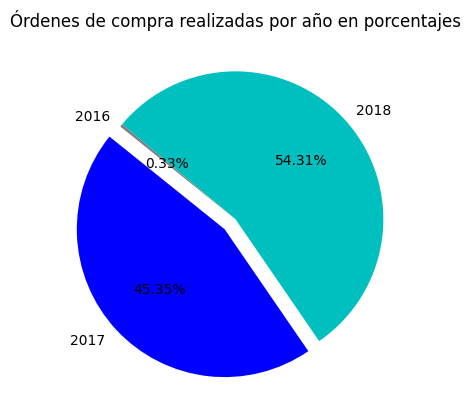

In [ ]:
colors = ['gray', 'b', 'c']
plt.pie(periodo_df['pedidos'], labels=periodo_df['año'], colors=colors,
        startangle=140,
        explode = (0, 0.1, 0),
        autopct = '%1.2f%%')

plt.title('Órdenes de compra realizadas por año en porcentajes')
plt.show()

*En este grafico podemos visualizar que el negocio ha aumentado considerablemente la cantidad de ordenes de compra durante los años 2017 y 2018 en comparacion al año 2016 que solo representa el 0.33% del total de las ordenes de compras de estos 3 años. La diferencia de ordenes entre los años 2017 y 2018 ha disminuido mucho en este sentido pero siempre mostrando una tendencia de crecimiento. Por la tendencia de los numeros se puede inferir que durante el año 2019 esto seguira en aumento.*

In [ ]:
#La cantidad de pedidos realizados en un período de tiempo determinado.
query_periodo_determinado = '''
  SELECT COUNT(o.order_id) AS pedidos, strftime('%m', o.order_purchase_timestamp) AS mes FROM orders AS o
  INNER JOIN customers AS c
  ON o.customer_id = c.customer_id
  GROUP BY mes
'''
periodo_mes_df = pd.read_sql_query(query_periodo_determinado, conn)
periodo_mes_df

,pedidos,mes
0,8069,01
1,8508,02
2,9893,03
3,9343,04
4,10573,05
5,9412,06
6,10318,07
7,10843,08
8,4305,09
9,4959,10


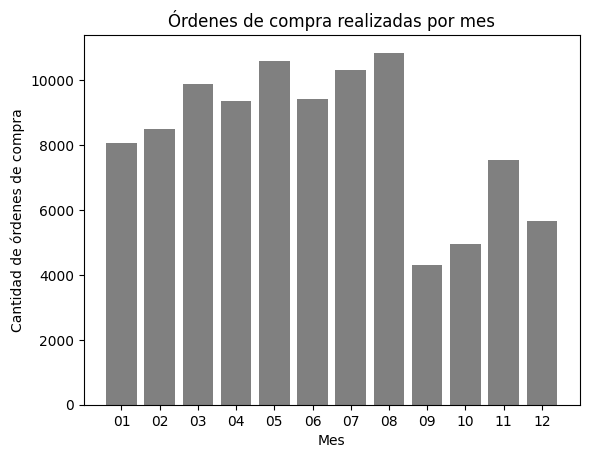

In [ ]:
plt.bar(periodo_mes_df['mes'], periodo_mes_df['pedidos'], color='grey')
plt.xlabel('Mes')
plt.ylabel('Cantidad de órdenes de compra')

plt.title('Órdenes de compra realizadas por mes')

plt.show()

*En este grafico ilustramos la variacion de la cantidad de ordenes de compra en los 12 meses del año. En esta podemos ver que en el mes que mas se producen compras es en el mes de Agosto (08) y en contrapartida el mes con menos ordenes de compras recibidas es Septiembre (09); por lo tanto del mes de agosto a septiembre se ve una abrupta caida.
Previo al mes de agosto se puede ver un comportamiento constantes sin grandes fluctuaciones de ordenes de compras. Y posterior al mes de septiembre se ve como se recupera y en diciembre vuelve a tener una leve caida respecto a noviembre.*

# Consultas SQL, analisis de popularidad de productos por categoria.

In [ ]:
#Agrupar los productos por categoría y calcula la cantidad total de unidades vendidas para cada categoría.
query_categoria = '''
  SELECT p.product_category_name AS Categoria, COUNT(p.product_category_name) AS total FROM products AS p
  INNER JOIN order_items AS i
  ON i.product_id = p.product_id
  GROUP BY categoria
  ORDER BY total DESC
  LIMIT 4
'''
categoria_df = pd.read_sql_query(query_categoria, conn)
categoria_df

,Categoria,total
0,cama_mesa_banho,11115
1,beleza_saude,9670
2,esporte_lazer,8641
3,moveis_decoracao,8334


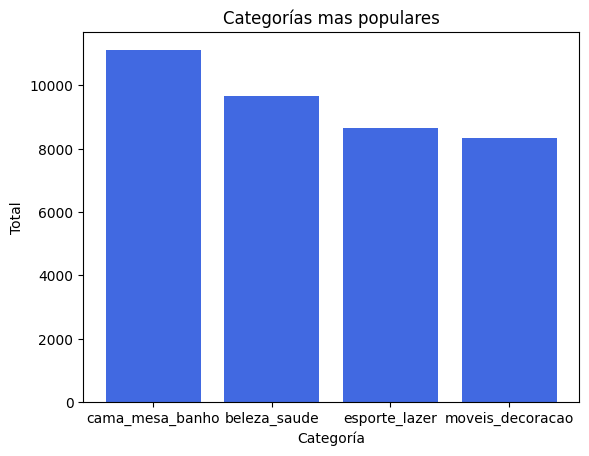

In [ ]:
#Generar un informe que muestre las categorías de productos más populares en términos de ventas.
plt.bar(categoria_df['Categoria'], categoria_df['total'], color='royalblue')
plt.xlabel('Categoría')
plt.ylabel('Total')

plt.title('Categorías mas populares')

plt.show()

*El grafico represneta las categorias de productos mas vendidas, en el grafico se representa las 4 mas vendidas. Como la categoria mas vendidas encontramos cama, mesa y baño, seguida por la categoria salud y belleza. Aunque no representa una gran variacion o una preferencia muy marcada ya que la diferencia en terminos de cantidad no es tan significativa*

# Consultas SQL, analisis de satisfaccion del cliente

In [ ]:
#Calcula el tiempo promedio de entrega de los pedidos por cliente.
query_tiempo_promedio = '''
  SELECT AVG(JULIANDAY(o.order_estimated_delivery_date) - JULIANDAY(o.order_purchase_timestamp)) AS tiempo_promedio, c.customer_id AS cliente FROM orders AS o
  INNER JOIN customers AS c
  ON o.customer_id = c.customer_id
  GROUP BY cliente
'''
tiempo_promedio_df = pd.read_sql_query(query_tiempo_promedio, conn)
tiempo_promedio_df

,tiempo_promedio,cliente
0,19.327477,00012a2ce6f8dcda20d059ce98491703
1,18.596852,000161a058600d5901f007fab4c27140
2,21.537002,0001fd6190edaaf884bcaf3d49edf079
3,28.451852,0002414f95344307404f0ace7a26f1d5
4,15.428970,000379cdec625522490c315e70c7a9fb
...,...,...
99436,28.292060,fffecc9f79fd8c764f843e9951b11341
99437,37.433310,fffeda5b6d849fbd39689bb92087f431
99438,11.293692,ffff42319e9b2d713724ae527742af25
99439,23.504491,ffffa3172527f765de70084a7e53aae8


In [ ]:
#Genera un informe que muestre los clientes con los tiempos de entrega más rápidos y más lentos.
mayor_tiempo = tiempo_promedio_df.nlargest(3, 'tiempo_promedio')
print("Valores mas altos:")
print(mayor_tiempo)
menor_tiempo = tiempo_promedio_df.nsmallest(3, 'tiempo_promedio')
print("Valores mas bajos:")
print(menor_tiempo)

Valores mas altos:
       tiempo_promedio                           cliente
19709       155.135463  32cef4bdd6bfa50612d81dc77a93b131
64487       149.592280  a5fbb6579eacbeb02752a143bfe82405
58291       146.249132  964253ff0e4e08180064764a450e521f
Valores mas bajos:
       tiempo_promedio                           cliente
71265         1.648993  b6f6cbfc126f1ae6723fe2f9b3751208
21989         2.008009  389aaa3d9c15ccb07e3b2185c4a8273c
44882         2.010451  7406b313ecf88d1e915e51c5044a8d51


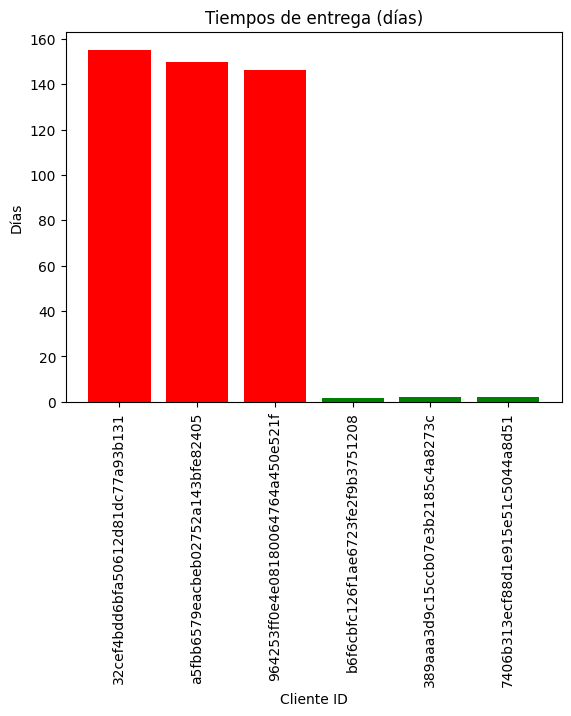

In [ ]:
menor_tiempo = menor_tiempo[::-1]
plt.bar(mayor_tiempo['cliente'], mayor_tiempo['tiempo_promedio'], color='red', label='Clientes mas lentos')
plt.bar(menor_tiempo['cliente'], menor_tiempo['tiempo_promedio'], color='green', label='Clientes mas rapido')

plt.xlabel('Cliente ID')
plt.ylabel('Días')

plt.title('Tiempos de entrega (días)')

plt.xticks(rotation='vertical')

plt.show()

*En este grafico podemos observar el tiempo de entrega de los paquetes en terminos de dias. Cuantos dias tardan en llegar estos paquetes al cliente, tomamos 6 ejemplos donde tenemos a los 3 clientes que recibieiron su pedido mas rapido y los 3 clientes que han tardado mas en recibirlo. Podemos ver una diferencia abismal entre estos dos tipos. Donde se puede observar que los que lo han tenido mas rapido como mucho han tardado 2 dias sin embargo los otros 3 ejemplos lo han recibido en promedio en unos 150 dias aproximadamente. Esto puede deberse a varios factores que deberian ser estudiados para mejorar la experiencia de compra de estos clientes.*

# Consultas SQL, analisis de rendimiento de los metodos de pago

In [ ]:
#Agrupar los pagos por método de pago y calcula el total de pagos realizados con cada método.
query_metodo_de_pago = '''
  SELECT m.payment_type AS metodo_pago, COUNT(m.payment_type) AS total FROM order_payments AS m
  GROUP BY metodo_pago
'''
metodo_pago_df = pd.read_sql_query(query_metodo_de_pago, conn)
metodo_pago_df

,metodo_pago,total
0,boleto,19784
1,credit_card,76795
2,debit_card,1529
3,not_defined,3
4,voucher,5775


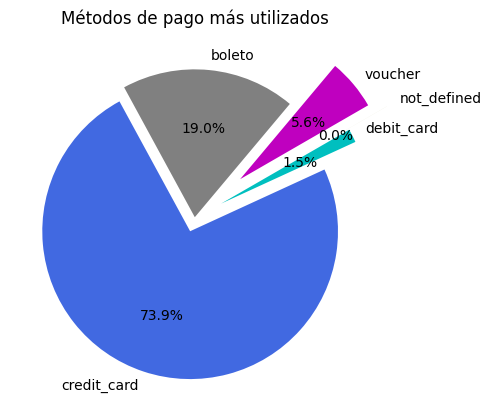

In [ ]:
#Generar un informe que muestre los métodos de pago más utilizados por los clientes.
colors = ['gray', 'royalblue', 'c', 'olive', 'm']
plt.pie(metodo_pago_df['total'], labels=metodo_pago_df['metodo_pago'], colors=colors,
        startangle=50,
        explode = (0, 0.1, 0.2, 0.5, 0.4),
        autopct = '%1.1f%%')

plt.title('Métodos de pago más utilizados')
plt.show()

*El grafico nos muestra los metodos de pago mas utilizados por lo clientes. Podemos ver que el metodo mas utilizado es la tarjeta de credito por amplia diferencia esto puede deberse a multiples razones ya sea porque se ofrecen beneficios con este metodo de pago como cuotas sin interes o un descuento. En segundo lugar tenemos el boleto que es optado por casi el 20% de los clientes y en menor medida los demas metodos de pago representando el 7 % restante.*

# Guardar en un archivo CSV

In [ ]:
with open('resultado.csv', 'w') as f:
  result_tabla.to_csv(f, index=False)
  result_index.to_csv(f, index=False)
  promedio_pedido.to_csv(f, index=False)
  clientes_df.to_csv(f, index=False)
  periodo_df.to_csv(f, index=False)
  periodo_mes_df.to_csv(f, index=False)
  categoria_df.to_csv(f, index=False)
  tiempo_promedio_df.to_csv(f, index=False)
  metodo_pago_df.to_csv(f, index=False)